In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from surprise import Reader, Dataset, SVD
from surprise.accuracy import rmse, mae
from surprise.model_selection import cross_validate

In [58]:
df = pd.read_csv(r'E:\Protfolio\Movie Recommendation System Using Surprise\ratings.csv')
df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [59]:
#we don not need timestap to recommend
df.drop('timestamp',axis=1,inplace=True) #axis=1 means dropping column

In [60]:
df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [61]:
#checking for missing values
df.isna().sum()

userId     0
movieId    0
rating     0
dtype: int64

In [62]:
#check for the numbers of total movies and users
movies= df['movieId'].nunique()  #nunique is similar to count but only takes unique values
users=df['userId'].nunique()
print('total number of movies =', movies)
print('total number of users =', users)

total number of movies = 9724
total number of users = 610


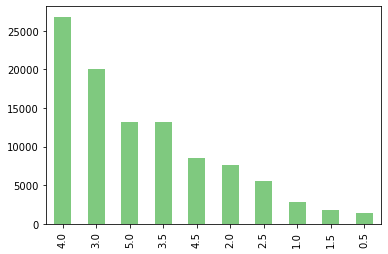

In [63]:
#count the ratings or how many times a rating is given
df['rating'].value_counts().plot(kind='bar',colormap='Accent')

In [64]:
#remove or filter the movies which have been rated less than 5 times
filter_movies = df['movieId'].value_counts() > 5
#make a list of those movies
filter_movies = filter_movies[filter_movies].index.tolist()
filter_movies

[356,
 318,
 296,
 593,
 2571,
 260,
 480,
 110,
 589,
 527,
 2959,
 1,
 1196,
 2858,
 50,
 47,
 780,
 150,
 1198,
 4993,
 1210,
 858,
 457,
 592,
 5952,
 2028,
 7153,
 588,
 608,
 2762,
 380,
 32,
 364,
 1270,
 377,
 4306,
 3578,
 1580,
 590,
 648,
 344,
 4226,
 367,
 6539,
 58559,
 595,
 1214,
 1036,
 500,
 165,
 79132,
 1265,
 1197,
 6377,
 1704,
 2628,
 1291,
 1721,
 316,
 153,
 1136,
 597,
 293,
 1193,
 3793,
 231,
 4886,
 10,
 6874,
 1089,
 7361,
 1240,
 1221,
 2329,
 34,
 1213,
 1200,
 1682,
 8961,
 541,
 736,
 4995,
 1097,
 5349,
 2683,
 733,
 1206,
 5445,
 4973,
 2716,
 1073,
 4963,
 33794,
 586,
 1527,
 5989,
 587,
 208,
 1968,
 5418,
 185,
 3147,
 3996,
 2,
 7438,
 349,
 253,
 1258,
 4878,
 924,
 2918,
 329,
 2115,
 1208,
 48516,
 4896,
 539,
 1732,
 1923,
 68954,
 60069,
 223,
 111,
 39,
 357,
 2706,
 161,
 778,
 1222,
 6,
 5816,
 454,
 292,
 434,
 1517,
 44191,
 912,
 4022,
 104,
 2997,
 339,
 750,
 3114,
 1617,
 72998,
 2987,
 6365,
 3949,
 1961,
 1784,
 4027,
 59315,
 25

In [65]:
#remove or filter the users who have rated less than 5 times
filter_users = df['userId'].value_counts() > 5
#make a list of those users
filter_users = filter_users[filter_users].index.tolist()
filter_users

[414,
 599,
 474,
 448,
 274,
 610,
 68,
 380,
 606,
 288,
 249,
 387,
 182,
 307,
 603,
 298,
 177,
 318,
 232,
 480,
 608,
 600,
 590,
 483,
 105,
 19,
 305,
 489,
 111,
 438,
 217,
 140,
 477,
 555,
 91,
 28,
 219,
 534,
 89,
 64,
 226,
 561,
 18,
 525,
 57,
 381,
 368,
 509,
 469,
 560,
 462,
 292,
 597,
 21,
 42,
 294,
 160,
 580,
 596,
 275,
 202,
 517,
 45,
 156,
 514,
 391,
 567,
 357,
 103,
 339,
 62,
 199,
 125,
 51,
 132,
 66,
 313,
 200,
 221,
 6,
 453,
 50,
 425,
 428,
 573,
 352,
 84,
 122,
 382,
 356,
 239,
 135,
 365,
 484,
 104,
 63,
 325,
 169,
 290,
 332,
 495,
 432,
 187,
 328,
 222,
 212,
 330,
 20,
 282,
 372,
 434,
 1,
 594,
 562,
 198,
 82,
 186,
 354,
 312,
 605,
 41,
 4,
 304,
 119,
 563,
 263,
 73,
 586,
 220,
 246,
 452,
 234,
 385,
 522,
 280,
 139,
 570,
 166,
 317,
 552,
 607,
 195,
 520,
 367,
 479,
 266,
 153,
 74,
 279,
 256,
 167,
 141,
 95,
 331,
 80,
 527,
 410,
 117,
 587,
 346,
 216,
 265,
 577,
 564,
 33,
 419,
 475,
 572,
 334,
 260,
 326,
 287,

In [66]:
#now filter those movies and users from dataframe
df= df[(df['movieId'].isin(filter_movies))&(df['userId'].isin(filter_users))]
df

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100830,610,166528,4.0
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0


In [67]:
#columns to use for training
columns = ['userId','movieId','rating']

#create reader from surprise 
reader = Reader(rating_scale =(0.5,5))

#create dataset from dataframe
data= Dataset.load_from_df(df[columns],reader)

#create trainset
trainset= data.build_full_trainset()

#create testset, here the anti_testset is testset
testset = trainset.build_anti_testset()

In [68]:
#create model
model = SVD(n_epochs = 25, verbose = True) #n_epochs:The number of iteration of the SGD procedure. Default is 20
                                           #verbose:If True, prints the current epoch. Default is False.

In [69]:
#cross validation
#**Mean Absolute Error (MAE)**: MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. 

#**Root mean squared error (RMSE)**:  RMSE is the square root of the average of squared differences between prediction and actual observation.

cross_validate(model,data, measures=['RMSE','MAE'], cv= 5, verbose= True)
print('Training Done')

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 0
P

In [72]:
#prediction
prediction = model.test(testset)
prediction[100]

Prediction(uid=1, iid=1199, r_ui=3.543813091304151, est=4.845976618734757, details={'was_impossible': False})

In [73]:
prediction[12]

Prediction(uid=1, iid=79132, r_ui=3.543813091304151, est=4.640823078034561, details={'was_impossible': False})

In [74]:
prediction[1245]

Prediction(uid=1, iid=3471, r_ui=3.543813091304151, est=4.845122968885882, details={'was_impossible': False})

In [78]:
#Now Recommend Users top 3 movies based on prediction

from collections import defaultdict
def get_top_n(prediction, n):
    
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in prediction:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the n highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n
top_n = get_top_n(prediction, n=3)
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, rating) in user_ratings])

1 [318, 6874, 48516]
2 [1178, 1204, 50]
3 [1945, 5618, 1199]
4 [1204, 6711, 1256]
5 [1204, 58559, 68157]
6 [1197, 3578, 1204]
7 [51255, 1673, 912]
8 [858, 56782, 38061]
9 [1204, 2959, 903]
10 [6711, 1204, 55442]
11 [916, 1198, 57669]
12 [47, 101, 356]
13 [1204, 6711, 1250]
14 [5618, 265, 1204]
15 [3552, 215, 1178]
16 [898, 1272, 1178]
17 [3275, 1204, 1172]
18 [1178, 1204, 750]
19 [318, 858, 4226]
20 [608, 1204, 541]
21 [1204, 1259, 1213]
22 [527, 3266, 1197]
23 [1204, 1178, 1084]
24 [1204, 904, 2959]
25 [47, 50, 1089]
26 [318, 6711, 1945]
27 [1204, 2571, 2160]
28 [27773, 112556, 1204]
29 [2571, 720, 912]
30 [904, 912, 1250]
31 [1204, 5747, 260]
32 [750, 7361, 858]
33 [912, 5618, 3083]
34 [4993, 3037, 2791]
35 [2019, 750, 912]
36 [858, 527, 1148]
37 [5618, 1228, 2019]
38 [1207, 904, 6016]
39 [318, 778, 58559]
40 [1204, 1213, 899]
41 [1278, 909, 1223]
42 [720, 38061, 1172]
43 [50, 101, 260]
44 [1197, 1235, 912]
45 [527, 1283, 318]
46 [1203, 750, 1204]
47 [1204, 2160, 4967]
48 [1210, 1196